In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
complaints = pd.read_pickle('../data/complaints_df.pkl')
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353432 entries, 0 to 353431
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   complaint        353432 non-null  object 
 1   category         353432 non-null  object 
 2   word_count       353432 non-null  int64  
 3   char_count       353432 non-null  int64  
 4   avg_word_len     353432 non-null  float64
 5   complaint_clean  353432 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.2+ MB


In [3]:
complaints['category_id'] = complaints['category'].factorize()[0]

In [4]:
category_id_df = complaints[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(complaints['complaint_clean'], 
                                                    complaints['category'],  
                                                    random_state = 369,
                                                    stratify=complaints['category'])

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=1500, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')

In [10]:
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

logreg = LogisticRegression(random_state=369, max_iter=1000).fit(X_train_vec, y_train)

y_pred = logreg.predict(X_test_vec)

confusion_matrix(y_test, y_pred)

array([[12731,   740,   113,  4620,    87],
       [  934,  4048,    28,   253,    48],
       [  131,    31,  2641,   269,    15],
       [ 3003,    65,    95, 53960,   203],
       [   61,    45,    17,   237,  3983]], dtype=int64)

In [11]:
accuracy_score(y_test, y_pred)

0.8755630503180244

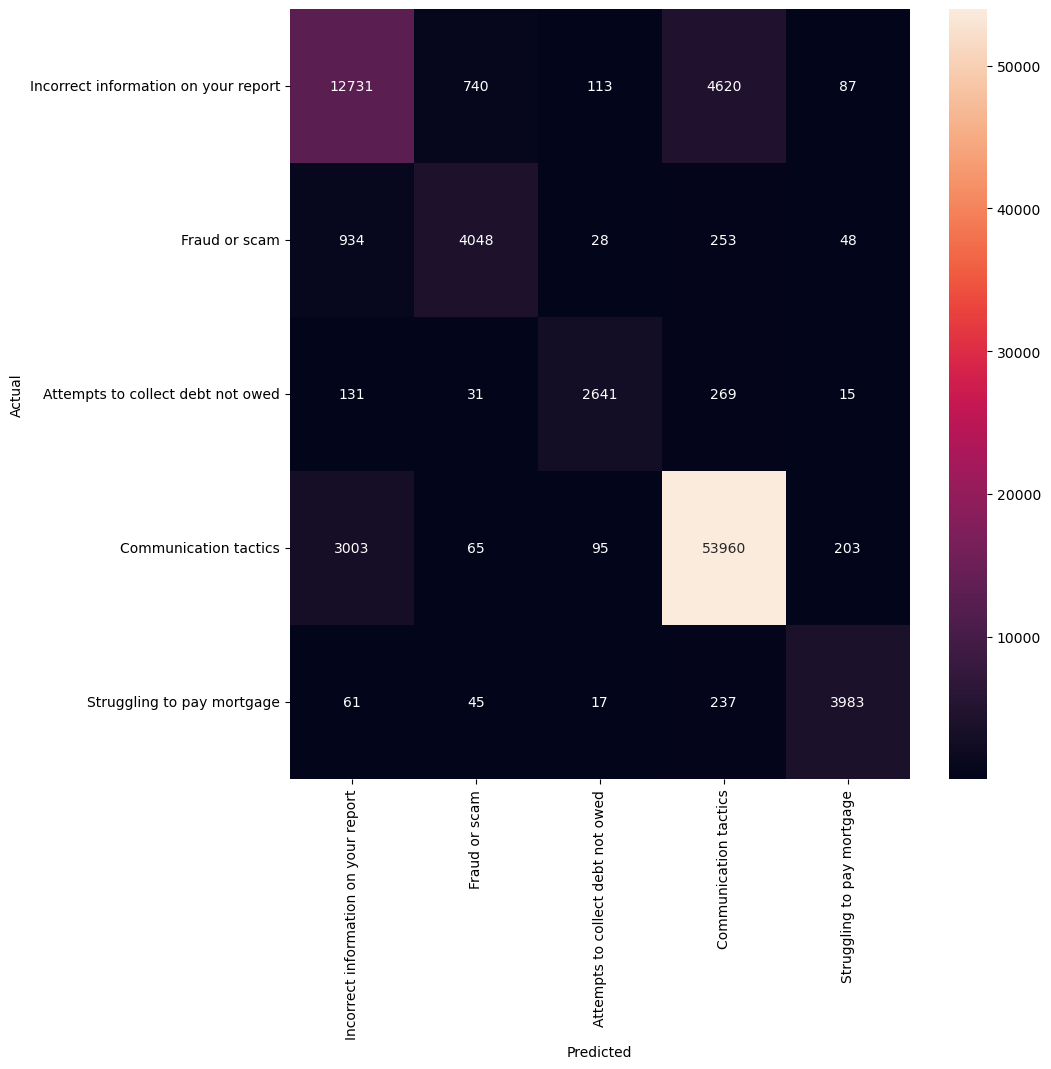

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
print(metrics.classification_report(y_test, y_pred, target_names=complaints['category'].unique()))

                                      precision    recall  f1-score   support

Incorrect information on your report       0.76      0.70      0.72     18291
                       Fraud or scam       0.82      0.76      0.79      5311
   Attempts to collect debt not owed       0.91      0.86      0.88      3087
               Communication tactics       0.91      0.94      0.93     57326
          Struggling to pay mortgage       0.92      0.92      0.92      4343

                            accuracy                           0.88     88358
                           macro avg       0.86      0.83      0.85     88358
                        weighted avg       0.87      0.88      0.87     88358

